In [1]:
import pandas as pd

# Загрузка датасета
df = pd.read_csv("Most popular 1000 Youtube videos.csv")

# Первичный анализ данных
print("Обзор данных:")
display(df.info())
print("\nПропущенные значения:")
display(df.isnull().sum())

Обзор данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   object
 3   Likes        1000 non-null   object
 4   Dislikes     527 non-null    object
 5   Category     982 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


None


Пропущенные значения:


rank             0
Video            0
Video views      0
Likes            0
Dislikes       473
Category        18
published        0
dtype: int64

In [2]:
# Преобразуем колонку 'Dislikes', 'Likes', 'Video Views' в числовой формат
df['Dislikes'] = df['Dislikes'].str.replace(',', '').astype(float)
df['Likes'] = df['Likes'].str.replace(',', '').astype(float)
df['Video views'] = df['Video views'].str.replace(',', '').astype(float)

In [3]:
data_cleaned = df.dropna()

print("Обзор данных:")
display(data_cleaned.info())
print("\nПропущенные значения:")
display(data_cleaned.isnull().sum())

Обзор данных:
<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 0 to 998
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         511 non-null    int64  
 1   Video        511 non-null    object 
 2   Video views  511 non-null    float64
 3   Likes        511 non-null    float64
 4   Dislikes     511 non-null    float64
 5   Category     511 non-null    object 
 6   published    511 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 31.9+ KB


None


Пропущенные значения:


rank           0
Video          0
Video views    0
Likes          0
Dislikes       0
Category       0
published      0
dtype: int64

In [4]:
# Разделение на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Признаки (X) и целевая переменная (y)
X = data_cleaned[["Video views", "Likes", "Dislikes"]]  # Пример признаков
y = data_cleaned["Category"]  # Целевая переменная

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Модель KNN***


Для начала подберем параметр = 5

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Создание и обучение модели
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_KNN = knn.predict(X_test)

# Оценка качества модели
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print(f"Точность модели: {accuracy_KNN:.2f}")


Точность модели: 0.34


***Модель логистической регрессии***

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Масштабирование данных (логистическая регрессия чувствительна к масштабу)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели
model_LogReg = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000)
model_LogReg.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred_LogReg = model_LogReg.predict(X_test_scaled)

# Оценка точности (Accuracy)
accuracy_LogReg = accuracy_score(y_test, y_pred_LogReg)
print(f"Accuracy: {accuracy_LogReg:.2f}")

Accuracy: 0.40


c:\Users\Иван\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


***Метод опорных векторов***

In [7]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# Определяем параметры для поиска
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

# Генерируем все комбинации параметров
param_combinations = list(itertools.product(param_grid['kernel'], param_grid['C'], param_grid['gamma'], param_grid['degree']))

# Переменные для хранения лучших параметров и точности
best_accuracy = 0
best_params = None

# Перебираем все комбинации параметров
for kernel, C, gamma, degree in param_combinations:
    # Создаем модель SVM с текущими параметрами
    svm_model = OneVsOneClassifier(SVC(kernel=kernel, C=C, gamma=gamma, degree=degree if kernel == 'poly' else 3))
    
    # Обучаем модель на обучающей выборке
    svm_model.fit(X_train_scaled, y_train)
    
    # Предсказываем метки классов для тестовой выборки
    y_pred_SVM = svm_model.predict(X_test_scaled)
    
    # Оцениваем точность модели
    accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
    
    # Если точность лучше, обновляем лучшие параметры
    if accuracy_SVM > best_accuracy:
        best_accuracy = accuracy_SVM
        best_params = {'kernel': kernel, 'C': C, 'gamma': gamma, 'degree': degree}

# Выводим лучшие параметры и точность
print("Лучшие параметры:", best_params)
print(f"Лучшая точность на тестовых данных: {best_accuracy:.2f}")


Лучшие параметры: {'kernel': 'rbf', 'C': 10, 'gamma': 'auto', 'degree': 2}
Лучшая точность на тестовых данных: 0.41


***Модель дерева решений***


In [8]:
from sklearn.tree import DecisionTreeClassifier

# Создание и обучение модели
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred_tree = model_tree.predict(X_test_scaled)

# Оценка accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy: {accuracy_tree:.2f}")

Accuracy: 0.33


***Модель бэггинга***

In [9]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Создаем базовую модель (дерево решений)
base_model = DecisionTreeClassifier()

# Создаем модель бэггинга
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=100, random_state=42)

# Обучаем модель
bagging_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_bagging = bagging_model.predict(X_test)

# Оценка качества
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Accuracy бэггинга: {accuracy_bagging}")

Accuracy бэггинга: 0.3786407766990291


***Модель случайного леса***

In [10]:
# Создаем модель случайного леса
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучаем модель
random_forest_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_rf = random_forest_model.predict(X_test)

# Оценка качества
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy случайного леса: {accuracy_rf}")

Accuracy случайного леса: 0.42718446601941745


***Модель AdaBoost***

In [11]:
# Создаем модель AdaBoost
adaboost_model = AdaBoostClassifier(estimator=base_model, n_estimators=100, random_state=42)

# Обучаем модель
adaboost_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_adaboost = adaboost_model.predict(X_test)

# Оценка качества
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"Accuracy AdaBoost: {accuracy_adaboost}")

Accuracy AdaBoost: 0.32038834951456313


***Модель градиентного бустинга***

In [12]:
# Создаем модель градиентного бустинга
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Обучаем модель
gradient_boosting_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_gb = gradient_boosting_model.predict(X_test)

# Оценка качества
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy градиентного бустинга: {accuracy_gb}")

Accuracy градиентного бустинга: 0.33980582524271846


Посмотрим на рспределение категорий

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'People & Blogs'),
  Text(1, 0, 'Music'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Sports'),
  Text(5, 0, 'Pets & Animals'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Gaming'),
  Text(8, 0, 'News & Politics'),
  Text(9, 0, 'Autos & Vehicles'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Education'),
  Text(12, 0, 'Science & Technology'),
  Text(13, 0, 'Travel & Events'),
  Text(14, 0, 'Howto & Style')])

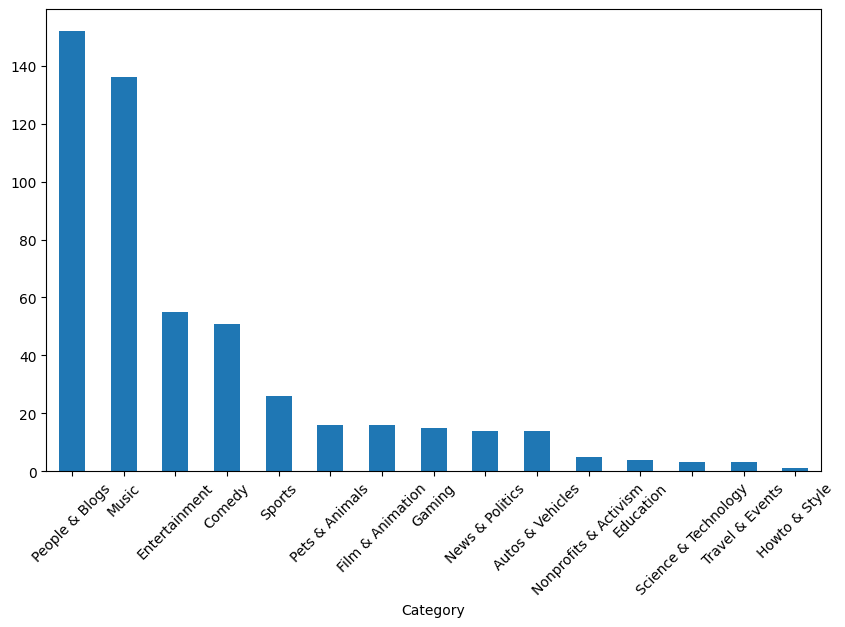

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
data_cleaned["Category"].value_counts().plot(kind='bar')
plt.xticks(rotation=45)


Необходимо избавиться от сильного дисбаланса классов для увеличения качества моделей. 

Методы Under-sampling имеет смысл применять в ситуациях, когда количество объектов minor-класса не является критически малым. К нашей ситуации это не применимо, т.к. объектов последних пяти категорий катастрофически мало, их количесвто очень близко к нулю.

Over-sampling - увеличение количества объектов minor-класса.

Методы данной группы необходимо применять при очень малых объемах minor-класса(ов). Нам это подходит

В выборку искусственно вносятся данные, которых изначально в ней не было. Следует сделить за тем, чтобы не менялись распределения признаков.


In [14]:
from imblearn.over_sampling import BorderlineSMOTE, RandomOverSampler
from imblearn.under_sampling import NeighbourhoodCleaningRule

# Шаг 1. Oversample до 25 все категории, которых < 20
ros = RandomOverSampler(
    sampling_strategy=lambda y: {
        label: 25 for label, count in pd.Series(y).value_counts().items() if count < 20
    },
    random_state=42
)
X_ros, y_ros = ros.fit_resample(X, y)

# Шаг 2. BorderlineSMOTE на предварительно сбалансированных данных
over = BorderlineSMOTE(
    sampling_strategy={
        'Entertainment': 70,
        'Comedy': 70,
        'Sports': 50,
        'Pets & Animals': 45,
        'Film & Animation': 40,
        'Gaming': 40,
        'News & Politics': 40,
        'Autos & Vehicles': 35,
        'Nonprofits & Activism': 30,
        'Education': 30,
        'Science & Technology': 30,
        'Travel & Events': 30,
        'Howto & Style': 30
    },
    random_state=42,
    k_neighbors=2,
    m_neighbors=5,
    kind='borderline-1'
)

X_over, y_over = over.fit_resample(X_ros, y_ros)

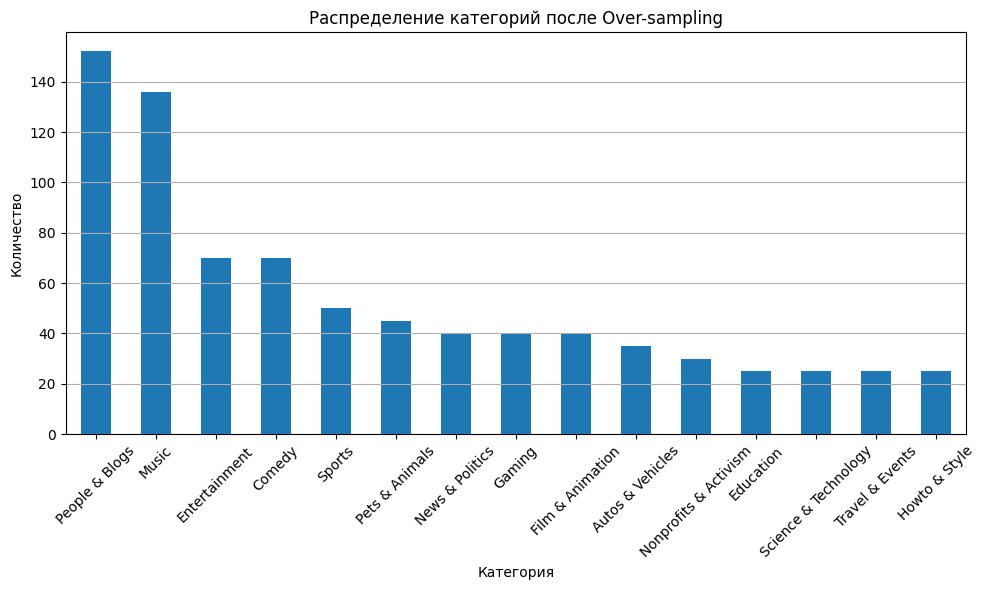

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Преобразуем y_over в Series
y_over_series = pd.Series(y_over)

# Строим график по убыванию количества
fig, ax = plt.subplots(figsize=(10, 6))
y_over_series.value_counts().sort_values(ascending=False).plot(kind='bar', ax=ax)

# Подписи и оформление
plt.title("Распределение категорий после Over-sampling")
plt.xlabel("Категория")
plt.ylabel("Количество")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Теперь, когда редкие классы «дотянуты», нужно избавиться от переизбытка мажоритарных классов, не теряя информативных объектов. Используем Under-sampling

Neighbourhood Cleaning Rule (NCR) оставляет только те объекты, которые имеют “хороших” соседей, то есть он очищает выборку, не уничтожая всю структуру

In [16]:
from sklearn.preprocessing import LabelEncoder

# Шаг 1: Закодируем строковые метки в числа
le = LabelEncoder()
y_over_encoded = le.fit_transform(y_over)

# Under-sampling
under = NeighbourhoodCleaningRule(
    sampling_strategy='auto',
    n_jobs=-1
)
X_resampled, y_resampled_encoded = under.fit_resample(X_over, y_over_encoded)

# Шаг 3: Декодируем обратно в строковые метки
y_resampled = le.inverse_transform(y_resampled_encoded)

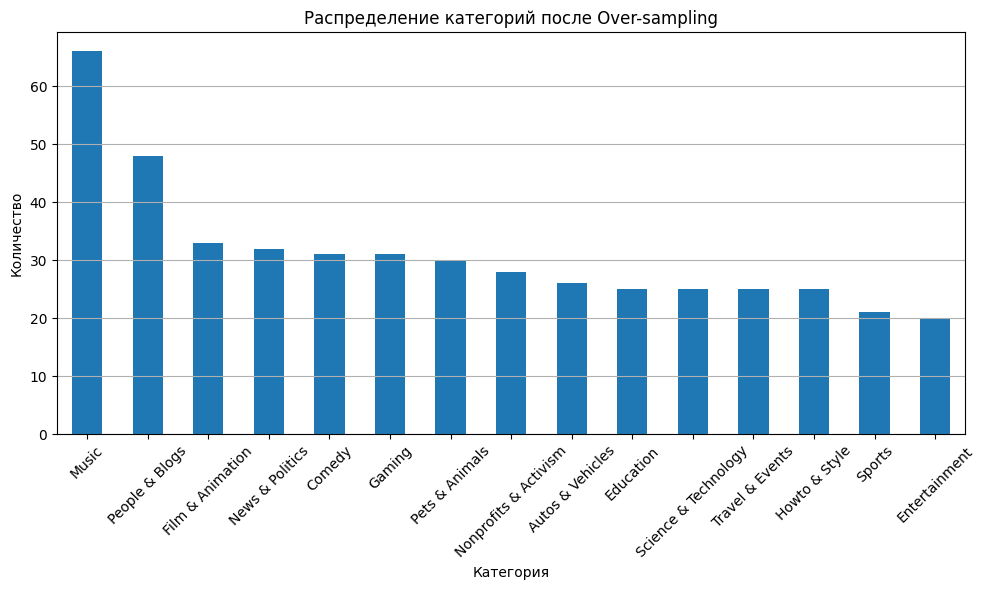

In [17]:
# Преобразуем y_over в Series
y_resampled_series = pd.Series(y_resampled)

# Строим график по убыванию количества
fig, ax = plt.subplots(figsize=(10, 6))
y_resampled_series.value_counts().sort_values(ascending=False).plot(kind='bar', ax=ax)

# Подписи и оформление
plt.title("Распределение категорий после Over-sampling")
plt.xlabel("Категория")
plt.ylabel("Количество")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


ТЕПЕРЬ ОБУЧИМ ТЕ ЖЕ МОДЕЛИ И СРАВНИМ ИХ КАЧЕСТВО С ИСХОДНЫМ

In [18]:
# Разделяем на новые обучающую и тестовую выборки
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_resampled, 
    y_resampled, 
    test_size=0.2, 
    random_state=42,
    stratify=y_resampled  # Сохраняет распределение классов
)

***KNN***

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Создание и обучение модели
knn_new = KNeighborsClassifier(n_neighbors=5)
knn_new.fit(X_train_new, y_train_new)

# Предсказание на тестовых данных
y_pred_KNN_new = knn_new.predict(X_test_new)

# Оценка качества модели
accuracy_KNN_new = accuracy_score(y_test_new, y_pred_KNN_new)
print(f"Точность модели: {accuracy_KNN_new:.2f}")


Точность модели: 0.76


ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Масштабирование данных (логистическая регрессия чувствительна к масштабу)
scaler_new = StandardScaler()
X_train_scaled_new = scaler_new.fit_transform(X_train_new)
X_test_scaled_new = scaler_new.transform(X_test_new)

# Создание и обучение модели
model_LogReg_new = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000)
model_LogReg_new.fit(X_train_scaled_new, y_train_new)

# Предсказание на тестовой выборке
y_pred_LogReg_new = model_LogReg_new.predict(X_test_scaled_new)

# Оценка точности (Accuracy)
accuracy_LogReg_new = accuracy_score(y_test_new, y_pred_LogReg_new)
print(f"Accuracy: {accuracy_LogReg_new:.2f}")

Accuracy: 0.22


c:\Users\Иван\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


МЕТОД ОПОРНЫХ ВЕКТОРОВ

In [21]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# Определяем параметры для поиска
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

# Генерируем все комбинации параметров
param_combinations = list(itertools.product(param_grid['kernel'], param_grid['C'], param_grid['gamma'], param_grid['degree']))

# Переменные для хранения лучших параметров и точности
best_accuracy_new = 0
best_params_new = None

# Перебираем все комбинации параметров
for kernel, C, gamma, degree in param_combinations:
    # Создаем модель SVM с текущими параметрами
    svm_model_new = OneVsOneClassifier(SVC(kernel=kernel, C=C, gamma=gamma, degree=degree if kernel == 'poly' else 3))
    
    # Обучаем модель на обучающей выборке
    svm_model_new.fit(X_train_scaled_new, y_train_new)
    
    # Предсказываем метки классов для тестовой выборки
    y_pred_SVM_new = svm_model_new.predict(X_test_scaled_new)
    
    # Оцениваем точность модели
    accuracy_SVM_new = accuracy_score(y_test_new, y_pred_SVM_new)
    
    # Если точность лучше, обновляем лучшие параметры
    if accuracy_SVM_new > best_accuracy_new:
        best_accuracy_new = accuracy_SVM_new
        best_params_new = {'kernel': kernel, 'C': C, 'gamma': gamma, 'degree': degree}

# Выводим лучшие параметры и точность
print("Лучшие параметры:", best_params_new)
print(f"Лучшая точность на тестовых данных: {best_accuracy_new:.2f}")


Лучшие параметры: {'kernel': 'rbf', 'C': 10, 'gamma': 'scale', 'degree': 2}
Лучшая точность на тестовых данных: 0.43


ДЕРЕВО РЕШЕНИЙ

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Создание и обучение модели
model_tree_new = DecisionTreeClassifier(random_state=42)
model_tree_new.fit(X_train_scaled_new, y_train_new)

# Предсказание на тестовой выборке
y_pred_tree_new = model_tree_new.predict(X_test_scaled_new)

# Оценка accuracy
accuracy_tree_new = accuracy_score(y_test_new, y_pred_tree_new)
print(f"Accuracy: {accuracy_tree_new:.2f}")

Accuracy: 0.88


БЭГГИНГ

In [23]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Создаем базовую модель (дерево решений)
base_model_new = DecisionTreeClassifier()

# Создаем модель бэггинга
bagging_model_new = BaggingClassifier(estimator=base_model_new, n_estimators=100, random_state=42)

# Обучаем модель
bagging_model_new.fit(X_train_new, y_train_new)

# Предсказание на тестовой выборке
y_pred_bagging_new = bagging_model_new.predict(X_test_new)

# Оценка качества
accuracy_bagging_new = accuracy_score(y_test_new, y_pred_bagging_new)
print(f"Accuracy бэггинга: {accuracy_bagging_new}")

Accuracy бэггинга: 0.925531914893617


СЛУЧАЙНЫЙ ЛЕС

In [24]:
# Создаем модель случайного леса
random_forest_model_new = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучаем модель
random_forest_model_new.fit(X_train_new, y_train_new)

# Предсказание на тестовой выборке
y_pred_rf_new = random_forest_model_new.predict(X_test_new)

# Оценка качества
accuracy_rf_new = accuracy_score(y_test_new, y_pred_rf_new)
print(f"Accuracy случайного леса: {accuracy_rf_new}")

Accuracy случайного леса: 0.9042553191489362


ADABOOST

In [25]:
# Создаем модель AdaBoost
adaboost_model_new = AdaBoostClassifier(estimator=base_model_new, n_estimators=100, random_state=42)

# Обучаем модель
adaboost_model_new.fit(X_train_new, y_train_new)

# Предсказание на тестовой выборке
y_pred_adaboost_new = adaboost_model_new.predict(X_test_new)

# Оценка качества
accuracy_adaboost_new = accuracy_score(y_test_new, y_pred_adaboost_new)
print(f"Accuracy AdaBoost: {accuracy_adaboost_new}")

Accuracy AdaBoost: 0.8829787234042553


ГРАДИЕНТНЫЙ БУСТИНГ

In [26]:
# Создаем модель градиентного бустинга
gradient_boosting_model_new = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Обучаем модель
gradient_boosting_model_new.fit(X_train_new, y_train_new)

# Предсказание на тестовой выборке
y_pred_gb_new = gradient_boosting_model_new.predict(X_test_new)

# Оценка качества
accuracy_gb_new = accuracy_score(y_test_new, y_pred_gb_new)
print(f"Accuracy градиентного бустинга: {accuracy_gb_new}")

Accuracy градиентного бустинга: 0.9468085106382979


***СРАВНЕНИЕ***

In [27]:
import pandas as pd

# Создаем словарь с данными
data = {
    'Модели': ['KNN', 'Логистическая регрессия', 'Метод опорных векторов', 
              'Дерево решений', 'Бэггинг', 'Случайный лес', 'AdaBoost', 'Градиентный бустинг'],
    'Accuracy до балансировки': [accuracy_KNN, accuracy_LogReg, best_accuracy, 
                               accuracy_tree, accuracy_bagging, accuracy_rf, 
                               accuracy_adaboost, accuracy_gb],
    'Accuracy после балансировки': [accuracy_KNN_new, accuracy_LogReg_new, best_accuracy_new,
                                  accuracy_tree_new, accuracy_bagging_new, accuracy_rf_new,
                                  accuracy_adaboost_new, accuracy_gb_new]
}

# Создаем DataFrame
results_df = pd.DataFrame(data)

# Отображаем таблицу с стилями
styled_df = (results_df.style
             .set_caption('Сравнение точности моделей до и после балансировки классов')
             .format({'Accuracy до балансировки': '{:.3f}', 
                     'Accuracy после балансировки': '{:.3f}'})
             .set_properties(**{'text-align': 'center'})
        #      .highlight_max(subset=['Accuracy до балансировки', 'Accuracy после балансировки'], 
        #                   color='lightgreen')
        #      .highlight_min(subset=['Accuracy до балансировки', 'Accuracy после балансировки'], 
        #                   color='#ffcccb')
        )

# Показываем таблицу
styled_df

,Модели,Accuracy до балансировки,Accuracy после балансировки
0,KNN,0.340,0.755
1,Логистическая регрессия,0.398,0.223
2,Метод опорных векторов,0.408,0.426
3,Дерево решений,0.330,0.883
4,Бэггинг,0.379,0.926
5,Случайный лес,0.427,0.904
6,AdaBoost,0.320,0.883
7,Градиентный бустинг,0.340,0.947
